# Optical Properties of AuQDots

In [2]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('style/sci.mplstyle')
import numpy as np

# Set parameter
c = 299792458 # velocity of light (m/s)
hbar = 6.582119569e-16 # reduced Planck constant (eV.s)
eps0 = 8.854187817e-12 # vacum permittivity (F/m)

# Open and read the real part of dielectric tensor diagonal components
ener, repsx, repsy, repsz = np.loadtxt('epsr_AuDots.dat', unpack=True)
# Open and read the imaginary part of dielectric tensor diagonal components
ener, iepsx, iepsy, iepsz = np.loadtxt('epsi_AuDots.dat', unpack=True)

# Count the average of real and imaginer part components
eps1 = (repsx+repsy+repsz)/3
eps2 = (iepsx+iepsy+iepsz)/3

In [3]:
# Define function of n, kappa, absorption coeff., and sigma real
def refractive_index(eps1, eps2) :
    n = ((eps1 + (eps1**2+eps2**2)**(0.5))**(0.5)) / np.sqrt(0.5)
    return n

def extinction_coeff(eps1, eps2) :
    kappa = ((-eps1 + (eps1**2+eps2**2)**(0.5))**(0.5)) / np.sqrt(0.5)
    return kappa

def absorption_coeff(ener, kappa, c, hbar) :
    alpha = (2*kappa*ener)/(hbar*c)
    return alpha

def sigma_real(eps2, ener, hbar) :
    sigma = (eps2*ener)/hbar
    return sigma

# Calculate the array of our definition above
n = refractive_index(eps1, eps2)
kappa = extinction_coeff(eps1, eps2)
alpha = absorption_coeff(ener, kappa, c, hbar)
sigma = sigma_real(eps2, ener, hbar)

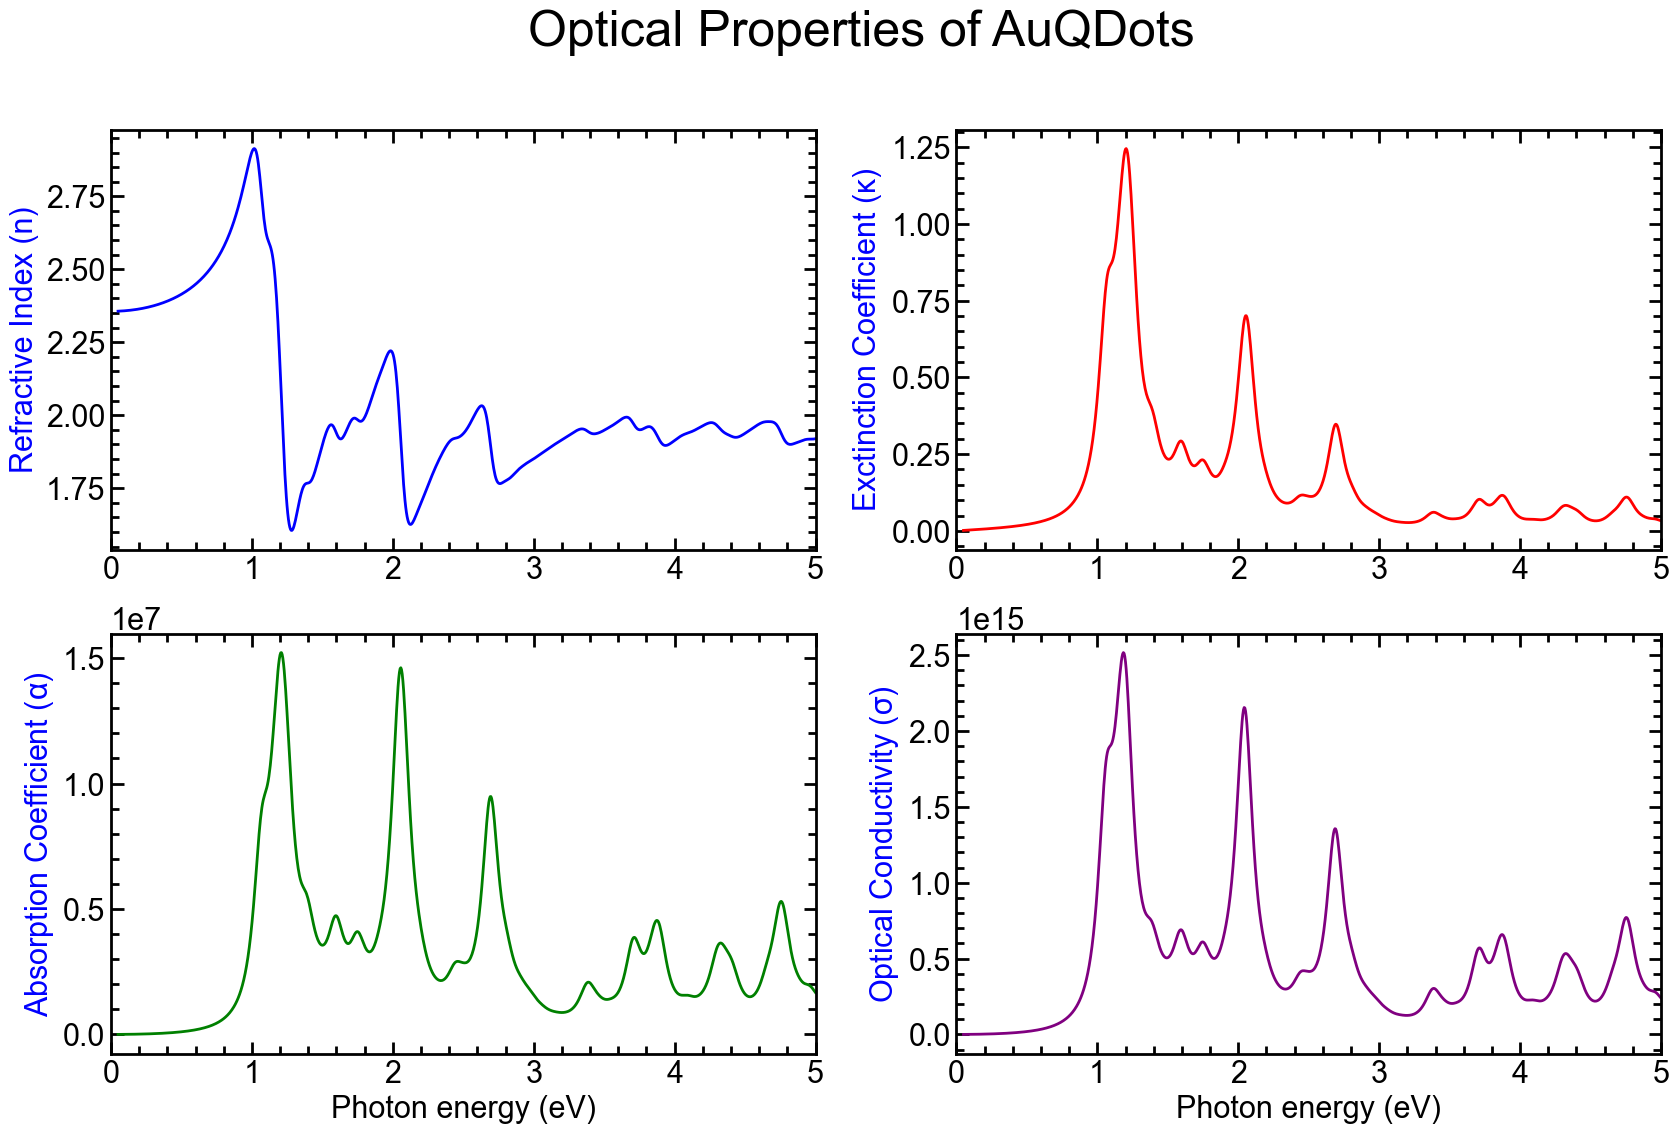

In [13]:
# Create figure object
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
# Plot the optical properties
ax[0,0].plot(ener, n, 'b-')
ax[0,1].plot(ener, kappa, 'r-')
ax[1,0].plot(ener, alpha, 'g-')
ax[1,1].plot(ener, sigma, color='purple')
# Add the x and y-axis labels
ax[1,0].set_xlabel('Photon energy (eV)')
ax[1,1].set_xlabel('Photon energy (eV)')
ax[0,0].set_ylabel(r'Refractive Index (n)', color='b')
ax[0,1].set_ylabel(r'Exctinction Coefficient ($\kappa$)', color='b')
ax[1,0].set_ylabel(r'Absorption Coefficient ($\alpha$)', color='b')
ax[1,1].set_ylabel(r'Optical Conductivity ($\sigma$)', color='b')
# Set the ornament
ax[0,0].set_xlim(0, 5)
ax[0,1].set_xlim(0, 5)
ax[1,0].set_xlim(0, 5)
ax[1,1].set_xlim(0, 5)
# ax[0,0].set_yticks([2.0, 3.0, 4.0, 5.0, 6.0])
# ax[1,0].set_ylim(0, 1.5e8)
# ax[1,0].set_yticks([0.0, 0.5e8, 1.0e8, 1.5e8])
fig.suptitle('Optical Properties of AuQDots', fontsize=36)

# save figure
fig.savefig('./Graph Optical Properties AuQDots.png', dpi=600)
plt.show()